<a href="https://colab.research.google.com/github/Tiago-Dias-Ferreira/PL2_Teste/blob/main/PL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Width in pixels: 940
Height in pixels: 230
Amount of channels: 3


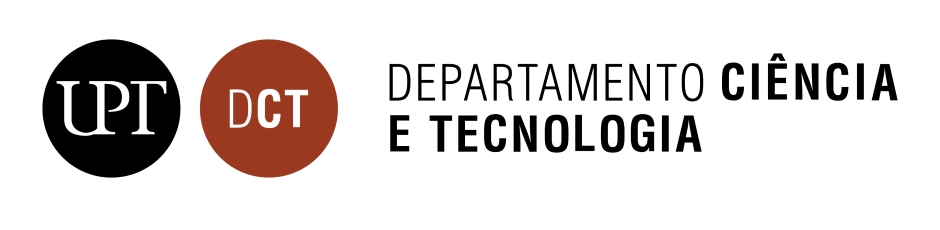

True

In [76]:
# Import libraries
import cv2
from google.colab.patches import cv2_imshow
# Image Reading with imread()
image = cv2.imread("DCT_img.jpg")
print('Width in pixels: ', end='')
print(image.shape[1]) #image width
print('Height in pixels: ', end='')
print(image.shape[0]) #image height
print('Amount of channels: ', end='')
print(image.shape[2])
# Show the image with imshow
cv2_imshow(image)
cv2.waitKey(0) #waiting to press a key
# Save a new image in your computer with imwrite()
cv2.imwrite("output.jpg", image)

In [57]:
import matplotlib.pyplot as plt
import cv2
(b, g, r) = image[0, 0,:]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 255, Green: 255, Blue: 255


In [55]:
import cv2
image[10, 10, :] = (0, 0, 255)
(b, g, r) = image[10, 10,:]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))


Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


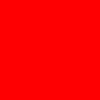

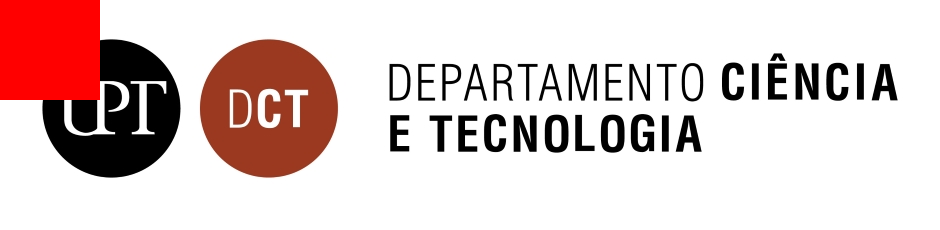

True

In [86]:
import matplotlib.pyplot as plt
import cv2
corner = image[0:100, 0:100]
cv2_imshow(corner)
cv2.waitKey(0)
image[0:100, 0:100] = (0, 0, 255)
cv2_imshow(image)
cv2.waitKey(0)
cv2.imwrite("output.jpg", image)

In [ ]:
import matplotlib.pyplot as plt
import cv2
for y in range(image.shape[0]): #rows
  for x in range(image.shape[1]): #colomns
    image[y, x] = (0,(x*y)%256,0)
  cv2_imshow(image)
  cv2.waitKey(0)


In [2]:
import numpy as np
import cv2
def order_points(pts):
# initialzie a list of coordinates that will be ordered
# such that the first entry in the list is the top-left,
# the second entry is the top-right, the third is the
# bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
# the top-left point will have the smallest sum, whereas
# the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
# now, compute the difference between the points, the
# top-right point will have the smallest difference,
# whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

# return the ordered coordinates
    return rect
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
# compute the width of the new image, which will be the
# maximum distance between bottom-right and bottom-left
# x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
# compute the height of the new image, which will be the
# maximum distance between the top-right and bottom-right
# y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
# now that we have the dimensions of the new image, construct
# the set of destination points to obtain a "birds eye view",
# (i.e. top-down view) of the image, again specifying points
#in the top-left, top-right, bottom-right, and bottom-left
# order
    dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]], dtype = "float32")
# compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
# return the warped image
    return warped